OPEN CV COLOR FORMAT IS **B G R**
# read Image

In [1]:
import cv2 as cv
import numpy as np 

In [2]:
img=cv.imread("E:/iCloud Photos (Personal Library)/IMG_0021.JPG")
cv.imshow('bike',img)
cv.waitKey(0)


-1

# read video/ capture video


In [3]:
capture= cv.VideoCapture("E:/iCloud Photos (Personal Library)/car.mp4")
while True:
    isTrue, frame= capture.read()
    cv.imshow('video',frame)

    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


: 

# Resizing and Rescaling

In [ ]:
def resizeFrame(frame, scale=0.75): # by default scale is 0.75
    width= int(frame.shape[1]* scale) # shape 1 is width
    height= int(frame.shape[0]* scale) # shape 0 in height
    dimensions=(width,height)
    return cv.resize( frame,dimensions, interpolation= cv.INTER_AREA) # resample image using pixel area without loosing quality.


capture = cv.VideoCapture("E:/iCloud Photos (Personal Library)/car.mp4")
while True:
    isTrue, frame = capture.read()
    cv.imshow('video', frame)
    resize=resizeFrame(frame)
    cv.imshow('Resized video', resize)

    if cv.waitKey(20) & 0xFF == ord('d'):
        break
capture.release()
cv.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


: 

# for live videos only

In [ ]:


def changeRes(width,height):
    capture.set(3,width)
    capture.set(4,height)
    

# Drawing shapes and putting names

In [ ]:
blank= np.zeros((500,500,3), dtype='uint8')  #uint8 is datatype for image 
cv.imshow('Blank', blank)
cv.waitKey(0)

-1

In [ ]:
# coloring green for above black image
blank[:]=0,255,0
cv.imshow('Green',blank)
blank[:] = 255, 0, 0
cv.imshow('Blue', blank)
blank[:] = 0, 0,255
cv.imshow('Red', blank)
cv.waitKey(0)

-1

In [ ]:
#coloring the pixels
blank[200:300, 300:400]=0,255,255
cv.imshow('Green',blank)
cv.waitKey(0)


-1

In [ ]:
# rectangle
cv.rectangle(blank,(0,0),(250,400),(0,255,0), 3)
cv.imshow('rectangle',blank)
cv.waitKey(0)
# OR


-1

In [ ]:
cv.rectangle(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2), (0,255,0),cv.FILLED)
cv.imshow('rectangle', blank)

cv.waitKey(0)


-1

In [ ]:
# circle
cv.circle(blank,(blank.shape[1]//2, blank.shape[0]//2), 40,(0,0,255),3)
cv.imshow("circle",blank)
cv.waitKey(0)

-1

In [ ]:
# line
cv.line(blank,(0,0),(blank.shape[1]//2, blank.shape[0]//2),(255,255,255),3)
cv.imshow('Line', blank)
cv.waitKey(0)

-1

In [ ]:
# write text                    # (225,225) insted of  dividing  for center or from origine use (0,0)or (0,255)
cv.putText(blank,"Sample Text",(blank.shape[1]//2, blank.shape[0]//2),cv.FONT_HERSHEY_DUPLEX,1.0,(0,255,255),1)
cv.imshow('blank',blank)
cv.waitKey(0)

-1

# Essential Funtions
1. Convert image into greyscale
2. Blur image- removes some noise in image
3. Edge Cascade - gives borders of the image
4. Dilating the image 
5. Eroding image
6. Resize image
7. cropping image

In [ ]:
# converting img into greyscale

img = cv.imread("E:/iCloud Photos (Personal Library)/IMG_0021.JPG")
cv.imshow('color', img)

gry=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('bike', gry)
cv.waitKey(0)


-1

In [ ]:
# Blur image  for more blur change ksize  3,3 to 7,7 or amt of blur required
img = cv.imread("E:/iCloud Photos (Personal Library)/IMG_0021.JPG")
cv.imshow('color', img)  
blur=cv.GaussianBlur(img,(7,7), cv.BORDER_DEFAULT)
cv.imshow('blur', blur)
cv.waitKey(0)

-1

In [ ]:
# edge casde - gives border of the images
canny=cv.Canny(img,125,175)
cv.imshow("border Image",canny)
cv.waitKey(0)
# to get  rid of some edges use blured imaged insted of original

-1

In [ ]:
# Dilating image

dilate= cv.dilate(canny,(10,10),iterations=2)
cv.imshow('Dilated image', dilate)
cv.waitKey(0)

-1

In [ ]:
# eroding image
erode=cv.erode(dilate,(7,7),iterations=3)
cv.imshow("Eroded image", erode)
cv.waitKey(0)

-1

In [ ]:
# resize image
resize=cv.resize(img,(500,500), interpolation= cv.INTER_AREA) # linerar or cubic cubic is slower
cv.imshow("Resized image", resize)
cv.waitKey(0)

-1

In [ ]:
#cropping image
crop= img[50:200, 200:400]
cv.imshow("croped image", crop)
cv.waitKey(0)


-1

# Image Transformation

In [ ]:
# translation - shifting image along x-y axis i.e.  up down left right

def translate(img, x,y):
    transMat= np.float32([[1,0,x],[1,0,y]])
    dimension= (img.shape[1],img.shape[0])
    return cv.warpAffine(img,transMat,dimension)
# -x --> left
#  x --> up
# -y --> right
#  y --> down

translated=translate(img,-100,100)
cv.imshow("Translated image", translated)
cv.waitKey(0)

-1

In [ ]:
# rotation of image 
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]

    if rotPoint is None:
        rotPoint=(width//2, height//2)

    rotMat=cv.getRotationMatrix2D(rotPoint, angle,1.0)
    dimensions=(width,height)
    return cv.warpAffine(img,rotMat,dimensions)

rotated= rotate(img,-45)
# can also rotate rotated image
# duble_rotated=rotated= rotate(img,-45)
cv.imshow("Rotated image", rotated)
cv.waitKey(0)

-1

In [ ]:
# Resizing image
resized= cv.resize(img,(500,500), interpolation=cv.INTER_CUBIC)
cv.imshow("resized image", resized)
cv.waitKey(0)

-1

In [ ]:
# Flipping image
flip= cv.flip(img, 0) 
# flip code- 0- flipping image vertically - x axis
# flip code- 1- flipping image horizontally - y axis
# flip code- -1- flipping image vertically and horizontally both
cv.imshow("flipped image", flip)
cv.waitKey(0)


-1

In [ ]:
# cropping
cropped= img[200:400,300:400]
cv.imshow("croped image", cropped)
cv.waitKey(0)


-1

# Contour Detection -> border of image
 shape analysis and object detection  and 
 1. cv.CHAIN_APPROX_NONE -> gives all lines
2. cv.CHAIN_APPROX_SIMPLE
 # edge detection is different

In [3]:

img = cv.imread("E:/iCloud Photos (Personal Library)/IMG_0021.JPG")
cv.imshow('color', img)

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow("gray imge",gray)

# blur = cv.GaussianBlur(gray, (5, 5), cv.BORDER_DEFAULT)
# cv.imshow("Blur image", blur)

# canny=cv.Canny(blur,125,175)
# cv.imshow("canny imge", canny)

ret,thresh= cv.threshold(gray,125,255,cv.THRESH_BINARY)
cv.imshow("threshhold imge", thresh)

contours,hierarchies=cv.findContours(thresh, cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print(len(contours),"Countours found")

cv.waitKey(0) 

1953 Countours found


-1

In [9]:
blank = np.zeros((img.shape), dtype='uint8')  # uint8 is datatype for image
cv.imshow('Blank', blank)

cv.drawContours(blank,contours,-1,(0,255,255),0)
cv.imshow("countours drawing", blank )
cv.waitKey(0)


-1

# Color Spaces
* BGR to grayscale
* BGR to Huge Saturation Value (HSV)
* BGR to LAB

In [11]:
#BGR to gray
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray Image",gray)
cv.waitKey(0)

-1

In [12]:
#BGR to Huge Saturation Value (HSV)
hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow("HSV image", hsv)
cv.waitKey(0)


-1

In [13]:
# BGR to LAB
lab=cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow("LAB image", lab)
cv.waitKey(0)


-1

In [16]:
# BGR to RGB
rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv.imshow("RGB image", rgb)
cv.waitKey(0)


-1

In [18]:
# cannot convert gray image to hsv and all types directly  it must be converted to bgr first
# HSV to BGR
hsv_to_bgr=cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
cv.imshow("hsv to bgr image", hsv_to_bgr)
cv.waitKey(0)
 

-1

# to display image in  graph
matplot lib show BGR  image that is inversion on BGR

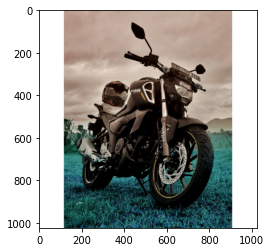

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

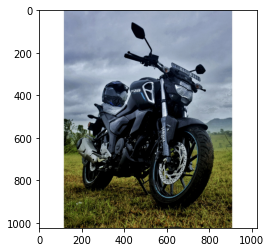

In [17]:
# Shows real rgb image than bgr
plt.imshow(rgb)
plt.show

# color channels